<a href="https://colab.research.google.com/github/Di12-23/tensorflow/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
try:
    %tensorflow_version 2.x
except Exception :
    pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [25]:
# loading the data
from sklearn.datasets import load_breast_cancer

In [26]:
data=load_breast_cancer()

In [27]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [28]:
type(data)

sklearn.utils._bunch.Bunch

In [29]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
data.data.shape

(569, 30)

In [31]:
data.target.shape

(569,)

In [32]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [35]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
## train test split
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)

In [38]:
n,d =x_train.shape

In [39]:
## training dataset
n,d

(381, 30)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
## create StandardScaler object first
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(d,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 34ms/step - loss: 0.7839 - accuracy: 0.5013 - val_loss: 0.6827 - val_accuracy: 0.5426
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7002 - accuracy: 0.5853 - val_loss: 0.6122 - val_accuracy: 0.6277
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6588 - val_loss: 0.5505 - val_accuracy: 0.7340
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5701 - accuracy: 0.7192 - val_loss: 0.4989 - val_accuracy: 0.7872
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5180 - accuracy: 0.7717 - val_loss: 0.4564 - val_accuracy: 0.8191
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.8189 - val_loss: 0.4200 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.8373 - val_loss: 0.3892 - val_accuracy: 0.8989
Epoch 8/100


In [53]:
print("train score",model.evaluate(x_train,y_train))
print("test score",model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9764
train score [0.10940629988908768, 0.9763779640197754]
6/6 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9840
test score [0.07418952137231827, 0.9840425252914429]


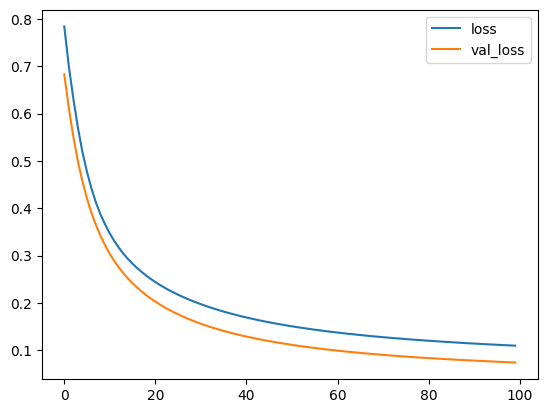

In [55]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

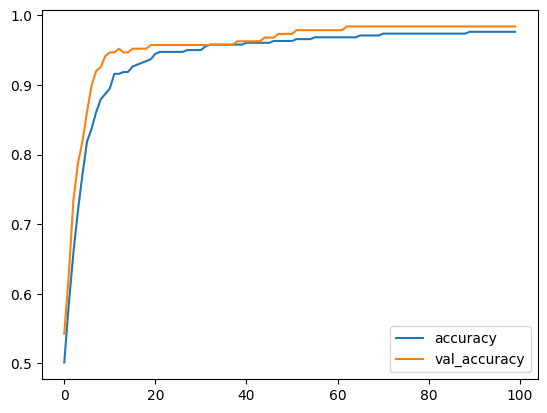

In [56]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()